In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\ASUS\\Documents\\Data Analysis\\BankChurners.csv")
# We are trying to find out how likely is it for the customers to get churned.

In [4]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [5]:
def Marital_Status(x):
    if x=='Married':
        return 1
    if x=='Single':
        return 2
    if x=='Divorced':
        return 3
    if x=='Unknown':
        return '0'
df['Marital_Status']=df['Marital_Status'].apply(Marital_Status)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,1,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,2,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,1,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,0,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,1,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.Marital_Status.unique()

array([1, 2, '0', 3], dtype=object)

In [7]:
# Now we need to convert the array to numeric variable :
df['Marital_Status']=df.Marital_Status.astype(float)

In [8]:
df.Marital_Status.unique()

array([1., 2., 0., 3.])

In [9]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [10]:
df=df.replace('Less than $40K','20')
df=df.replace('$40K - $60K','50')
df=df.replace('$60K - $80K','70',)
df=df.replace('$80K - $120K','100')
df=df.replace('$120K +','150')
df=df.replace('Unknown','0')
df['Income_Category']=df['Income_Category'].astype(int)

In [11]:
df.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [12]:
df=df.replace('Blue','1')
df=df.replace('Gold','2')
df=df.replace('Silver','3')
df=df.replace('Platinum','4')
df['Card_Category']=df['Card_Category'].astype(int)

In [13]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,1.0,70,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,2.0,20,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,1.0,100,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,0.0,20,1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,1.0,70,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
df.Dependent_count.unique()

array([3, 5, 4, 2, 0, 1], dtype=int64)

In [15]:
#Now check for relevant attributes for the analysis :
# 1. Attrition Flag - Existing and Attrited Customers
# 2. Customer Age - Age of the customers
# 3. Gender - Male/Female
# 4. Dependent_Count - No of dependents
# 5. Education_Level - Qualification of the customers
# 6. Marital_Status - Married/Single/Divorced/Seperated
# 7. Income_Category - Customer's Earning
# 8. Card_Category - Which category does the customer comes in
# 9. Months on Book (Period of relationship with bank) - If existing, then how long has the customer resided
# 10. Month_Inactive_12_mon (no of months the customer didnt use the card) 
# 11. Contacts_Count_12_mon (no of times customer contact the customer care)
# 12. Credit Limit 
# 13. Total_Revolving_Bal(outstanding balance) 
# 14. Total_Transaction_Amount - amt customer used to make one transaction on card
# 15. Avg_Utilization_Ratio - 

In [16]:
#In order to remove the not so important features from the final data, we can use the drop function as given below :
df2= df.drop(['Income_Category','Marital_Status','Education_Level','Card_Category','Dependent_count','Gender','Customer_Age','Avg_Open_To_Buy','CLIENTNUM','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'],axis=1)

In [17]:
df2.head(6)

,Attrition_Flag,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Utilization_Ratio
0,Existing Customer,39,5,1,3,777,0.061
1,Existing Customer,44,6,1,2,864,0.105
2,Existing Customer,36,4,1,0,0,0.000
3,Existing Customer,34,3,4,1,2517,0.760
4,Existing Customer,21,5,1,0,0,0.000
5,Existing Customer,36,3,1,2,1247,0.311


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Months_on_book            10127 non-null  int64  
 2   Total_Relationship_Count  10127 non-null  int64  
 3   Months_Inactive_12_mon    10127 non-null  int64  
 4   Contacts_Count_12_mon     10127 non-null  int64  
 5   Total_Revolving_Bal       10127 non-null  int64  
 6   Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 553.9+ KB


In [19]:
# Similarily we need to convert the other ojects into floating numbers such as attrition_flag
def Attrition_Flag(x):
    if x == 'Existing Customer':
        return 1
    if x == 'Attrited Customer':
        return 2

In [20]:
df2['Attrition_Flag'] = df2['Attrition_Flag'].apply(Attrition_Flag)
df2.head(6)

,Attrition_Flag,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Utilization_Ratio
0,1,39,5,1,3,777,0.061
1,1,44,6,1,2,864,0.105
2,1,36,4,1,0,0,0.000
3,1,34,3,4,1,2517,0.760
4,1,21,5,1,0,0,0.000
5,1,36,3,1,2,1247,0.311


In [21]:
# As we can see all the columns are now either integers or floating numbers, therefore, we can import sklearn package to start our prediction :
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()

In [22]:
feature_columns = ['Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Avg_Utilization_Ratio']
# After defining the feature columns, we need to assign Xand Y axis :
X = df2[feature_columns]
Y = df2.Attrition_Flag

In [23]:
X.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Utilization_Ratio
0,39,5,1,3,777,0.061
1,44,6,1,2,864,0.105
2,36,4,1,0,0,0.000
3,34,3,4,1,2517,0.760
4,21,5,1,0,0,0.000


In [24]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

In [25]:
# Created a new function and assigned X.columns to the new function :
feature_names=X.columns

In [26]:
X=imp_mean.fit_transform(X)
X

array([[3.900e+01, 5.000e+00, 1.000e+00, 3.000e+00, 7.770e+02, 6.100e-02],
       [4.400e+01, 6.000e+00, 1.000e+00, 2.000e+00, 8.640e+02, 1.050e-01],
       [3.600e+01, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [3.600e+01, 5.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 0.000e+00],
       [3.600e+01, 4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       [2.500e+01, 6.000e+00, 2.000e+00, 4.000e+00, 1.961e+03, 1.890e-01]])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
Scaler=StandardScaler()

In [29]:
Scaler.fit(X) # fitting the data

StandardScaler()

In [30]:
X2=Scaler.transform(X)
X2

array([[ 0.38462088,  0.76394261, -1.32713603,  0.49240377, -0.47342222,
        -0.77588223],
       [ 1.01071482,  1.40730617, -1.32713603, -0.41161598, -0.36666682,
        -0.61627565],
       [ 0.00896451,  0.12057905, -1.32713603, -2.21965548, -1.42685834,
        -0.99715499],
       ...,
       [ 0.00896451,  0.76394261,  0.65194019,  1.39642352, -1.42685834,
        -0.99715499],
       [ 0.00896451,  0.12057905,  0.65194019,  0.49240377, -1.42685834,
        -0.99715499],
       [-1.36844216,  1.40730617, -0.33759792,  1.39642352,  0.97943283,
        -0.31157218]])

In [31]:
X2_train,X2_test,Y_train,Y_test = train_test_split(X2,Y,test_size=0.2, random_state=13,stratify=Y)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train,Y_train)

KNeighborsClassifier()

In [34]:
Y_pred = knn.predict(X2_test)

In [35]:
Y_pred # This shows that attrition flag, 1 being the existing customers and 2 being the already left ones.

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [36]:
knn.score(X2_train,Y_train)

0.8921120849277867

In [37]:
knn.score(X2_test,Y_test)

0.8677196446199408

In [38]:
# Now we need to create a confusion matrix, imported the confusion matrix package from sklearn.
from sklearn.metrics import roc_auc_score, confusion_matrix

In [39]:
confusion_matrix(Y_test,knn.predict(X2_test))

array([[1614,   87],
       [ 181,  144]], dtype=int64)

# Above Knn model predicted - 1614 customers to be true positive which means that the model predicted these many are continuing using the credit card service and they were even found currently using the service.
# 87 customers were predicted to be coming under false positive - the model predicted that the customer left the service however they were found to be using the service.
# 181 customers comes under false negative - the model predicted that these set will continue using the service however they left using the service.
# 144 customers comes under true negative - model predicted that they wont continue using the service and they were even found not using the service as well.

In [40]:
from sklearn import tree

In [41]:
dt=tree.DecisionTreeClassifier(max_depth=4,random_state=12)

In [42]:
dt.fit(X2_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=12)

In [43]:
dt.score(X2_train,Y_train)

0.8594000740649302

In [44]:
dt.score(X2_test,Y_test)

0.8519249753208292

In [45]:
dt.feature_importances_

array([0.02012305, 0.10106159, 0.13953363, 0.11716714, 0.59777911,
       0.02433548])

<BarContainer object of 6 artists>

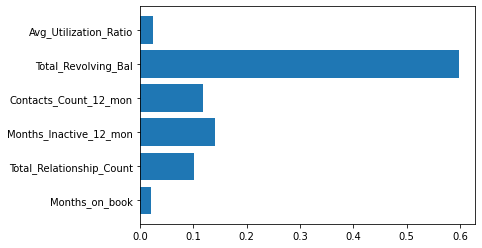

In [46]:
plt.barh(feature_names,dt.feature_importances_)
# Here the given below graph shows that the not so important features/columns which can be removed from the analysis from the very beginning so we can have our predictions improvised.
# 'Income_Category','Marital_Status','Education_Level','Card_Category','Dependent_count','Gender','Customer_Age' are found to be noty so important features and hence should be removed from the analysis from the very beginning so we can get the prediction values improvised.

In [47]:
confusion_matrix(Y_test,dt.predict(X2_test))

array([[1662,   39],
       [ 261,   64]], dtype=int64)

# From the above confusion matrix, we found the model to be predicting 1665 customers would continue using the credit card service and were found to be actually continuing using the service, comes under true positive.
# 36 of them would come under false positive which means that the 38 of them were predicted to leave the service however they were found still using the service.
# 263 of them would come under false negative which means that 263 customers were predicted to be continuing using the service however they left the service.
# 62 of them would come under true negative which means that 62 customers were predicted to leave the service and they were foudn left.

In [48]:
roc_auc_score(Y_test,dt.predict(X2_test))

0.5869976936643604

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators =100, random_state =13)

In [51]:
rf.fit(X2_train,Y_train)

RandomForestClassifier(random_state=13)

In [52]:
rf.score(X2_train,Y_train)

0.969756820145661

In [53]:
rf.score(X2_test,Y_test)

0.8593287265547878

In [54]:
confusion_matrix(Y_test,rf.predict(X2_test))

array([[1603,   98],
       [ 187,  138]], dtype=int64)

In [55]:
roc_auc_score(Y_test,rf.predict(X2_test))

0.6835011079455524

In [56]:
rf.feature_importances_

array([0.25619342, 0.09438861, 0.09369514, 0.1138605 , 0.24894744,
       0.19291489])

<BarContainer object of 6 artists>

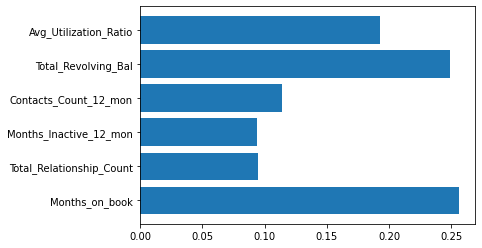

In [57]:
plt.barh(feature_names,rf.feature_importances_) # here we found that all the features selected were important to run the predictive analysis.

# Avg_Utilization_Ratio, Total_Revolving_Bal, Contacts_Count_12_mon, Months_Inactive_12_mon, Total_Relationship_Count, Months_on_book were found to be the main reasons which led to customers quit using the service.
# Customer are reluctant to make payments towards the additional interest charged on their respective cards.
# Contacts_Count_12_mon refers to the time the customer contacted the customer care to raise card related concerns.
# Months_Inactive_12_mon refers to the number of months the customer haven't used the card.
# Total_Relationship_Count refers to the number of years the customer has relationship with the bank/credit card company.
# Months_on_book refers to the number of months the customer has been using the card.
# Hence these columns should be analysed seperately to understand the main issues as to why the customers are not satisfied with the service and what is causing them to leave using the service.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
dt=DecisionTreeClassifier(max_depth=2)
knn=KNeighborsClassifier(n_neighbors=5)
lr=LogisticRegression()

In [60]:
from sklearn.ensemble import VotingClassifier

In [61]:
clf_voting=VotingClassifier(estimators=[('dt',dt),('knn',knn),('lr',lr)])

In [62]:
clf_voting.fit(X2_train,Y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=2)),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression())])

In [63]:
clf_voting.score(X2_train,Y_train)

0.8652018269349463

In [64]:
clf_voting.score(X2_test,Y_test)

0.861796643632774

In [65]:
print("Score of Decision Tree:",dt.fit(X2_train,Y_train).score(X2_train,Y_train))
print("Score of KNN:",knn.fit(X2_train,Y_train).score(X2_train,Y_train))
print("Score of Logistic Regression:",lr.fit(X2_train,Y_train).score(X2_train,Y_train))

Score of Decision Tree: 0.8392791013455129
Score of KNN: 0.8921120849277867
Score of Logistic Regression: 0.8579187754598198


In [66]:
print("Score of Decision Tree:",dt.fit(X2_train,Y_train).score(X2_test,Y_test))
print("Score of KNN:",knn.fit(X2_train,Y_train).score(X2_test,Y_test))
print("Score of Logistic Regression:",lr.fit(X2_train,Y_train).score(X2_test,Y_test))

Score of Decision Tree: 0.8395853899308984
Score of KNN: 0.8677196446199408
Score of Logistic Regression: 0.8588351431391905


In [67]:
confusion_matrix(Y_test,clf_voting.predict(X2_test))

array([[1686,   15],
       [ 265,   60]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(Y_test,clf_voting.predict(X2_test)))

              precision    recall  f1-score   support

           1       0.86      0.99      0.92      1701
           2       0.80      0.18      0.30       325

    accuracy                           0.86      2026
   macro avg       0.83      0.59      0.61      2026
weighted avg       0.85      0.86      0.82      2026



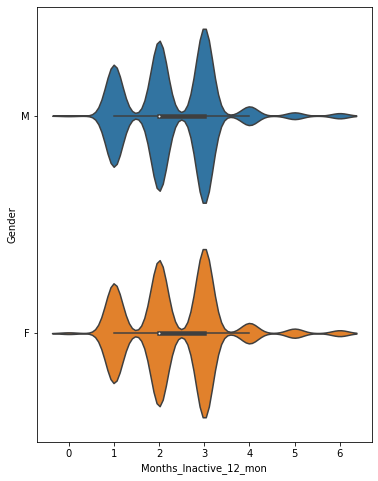

In [70]:
# As we know the columns responsible for customer churn, we now will try to analyse these columns seperately so we can find out the main issues or causes which leads the customer to stop using the service.
plt.figure(figsize=(6,8))
ax=sns.violinplot(x='Months_Inactive_12_mon', y='Gender', data=df)
plt.show()

# Now we will have to use groupby function to answer some questions :
# How often do the customers stop using the card after being contacted or after contacting the customer care?
# How much is the revolving balance of those customers who tend to be become inactive for some time?
# How long are the customers associated with the company who seek help from customer care and how actively do they use the card?
# Is the avg utilization ratio high for the existing customers or for the ones who newly joined in.

In [71]:
# We are trying to understand the frequency of customers not being active after contacting the customer service.
df3=df.groupby(['Attrition_Flag','Gender'])['Contacts_Count_12_mon'].count()

In [72]:
# We need to plot the data which is why we need to save the dataframe in csv format :
df3.to_csv('Attrition_Flag_Gender.csv')
# Now we will read the data :
df3=pd.read_csv('Attrition_Flag_Gender.csv')
# Now we will try to use the pivot function with Attrition_Flag and Gender as index :
df3= pd.pivot_table(df3, values=None,index='Attrition_Flag',columns='Gender',fill_value=0,aggfunc=np.sum)
df3

Contacts_Count_12_mon      
Gender                                F     M
Attrition_Flag                               
Attrited Customer                   930   697
Existing Customer                  4428  4072

In [73]:
# Similarily we can find the same as per the customer's marital status :
df4 =df.groupby(['Attrition_Flag','Marital_Status'])['Contacts_Count_12_mon'].count()

In [74]:
df.Marital_Status.unique()

array([1., 2., 0., 3.])

In [75]:
df4.to_csv('Attrition_Flag_Marital_Status.csv')
df4=pd.read_csv('Attrition_Flag_Marital_Status.csv')
df4=pd.pivot_table(df4, values=None,index='Attrition_Flag',columns='Marital_Status',fill_value=0,aggfunc=np.sum)
df4
# Here we found that the married customers were found leaving the service as compared to the single divorced and unknown customer lot.

Contacts_Count_12_mon                 
Marital_Status                      0.0   1.0   2.0  3.0
Attrition_Flag                                          
Attrited Customer                   129   709   668  121
Existing Customer                   620  3978  3275  627

In [76]:
# The next question would be is the avg utilization ratio high for existing or the ones who joined new :
df5=df.groupby(['Card_Category','Attrition_Flag'])['Avg_Utilization_Ratio'].count()

In [77]:
df5.to_csv('Card_Category_Attrition_Flag.csv')
df5=pd.read_csv('Card_Category_Attrition_Flag.csv')
df5=pd.pivot_table(df5, values=None,index='Card_Category',columns='Attrition_Flag',fill_value=0,aggfunc=np.sum)
df5 # thsi will show the card category from mostly the customers are getting churned from.

Avg_Utilization_Ratio                  
Attrition_Flag     Attrited Customer Existing Customer
Card_Category                                         
1                               1519              7917
2                                 21                95
3                                 82               473
4                                  5                15

In [78]:
df6=df.groupby(['Income_Category','Attrition_Flag'])['Avg_Utilization_Ratio'].count()

In [79]:
df6.to_csv('Income_Category_Attrition_Flag.csv')
df6=pd.read_csv('Income_Category_Attrition_Flag.csv')
df6=pd.pivot_table(df6, values=None,index='Income_Category',columns='Attrition_Flag',fill_value=0,aggfunc=np.sum)
df6 # this shows that the income category between 80 to 120 showed high utilization ratio who got churned and those with income earning lesser than 40k had high utilization and were found still using the service.


Avg_Utilization_Ratio                  
Attrition_Flag      Attrited Customer Existing Customer
Income_Category                                        
0                                 187               925
20                                612              2949
50                                271              1519
70                                189              1213
100                               242              1293
150                               126               601

<AxesSubplot:xlabel='Income_Category'>

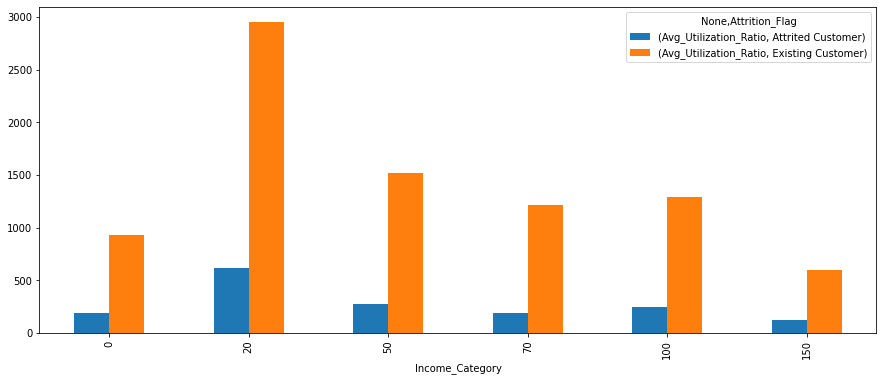

In [80]:
df6.plot(kind='bar', figsize=(15,6))

In [81]:
# Similarily, we will do the same for card_category as well :
df7=df.groupby(['Card_Category','Attrition_Flag'])['Avg_Utilization_Ratio'].count()

In [82]:
df7.to_csv('Card_Category_Attrition_Flag.csv')
df7=pd.read_csv('Card_Category_Attrition_Flag.csv')
df7=pd.pivot_table(df7, values=None,index='Card_Category',columns='Attrition_Flag',fill_value=0,aggfunc=np.sum)
df7 # Avg utilization ratio was found to be higher for the blue card category for the attrited and existing customers as well.

Avg_Utilization_Ratio                  
Attrition_Flag     Attrited Customer Existing Customer
Card_Category                                         
1                               1519              7917
2                                 21                95
3                                 82               473
4                                  5                15

<AxesSubplot:xlabel='Card_Category'>

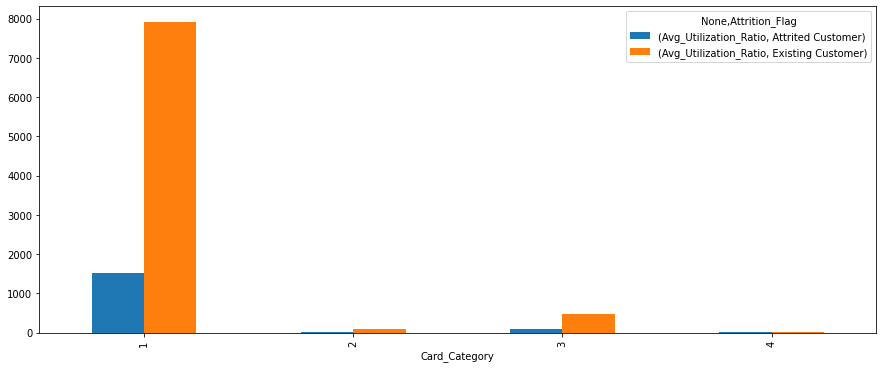

In [83]:
df7.plot(kind='bar', figsize=(15,6))

In [84]:
df8=df.groupby(['Dependent_count','Attrition_Flag'])['Avg_Utilization_Ratio'].count()

In [85]:
df8.to_csv('Dependent_count_Attrition_Flag.csv')
df8=pd.read_csv('Dependent_count_Attrition_Flag.csv')
df8=pd.pivot_table(df8, values=None,index='Dependent_count',columns='Attrition_Flag',fill_value=0,aggfunc=np.sum)
df8 # here we can see that the utilization ratio is high for those customers who have three number of dependents.

Avg_Utilization_Ratio                  
Attrition_Flag      Attrited Customer Existing Customer
Dependent_count                                        
0                                 135               769
1                                 269              1569
2                                 417              2238
3                                 482              2250
4                                 260              1314
5                                  64               360

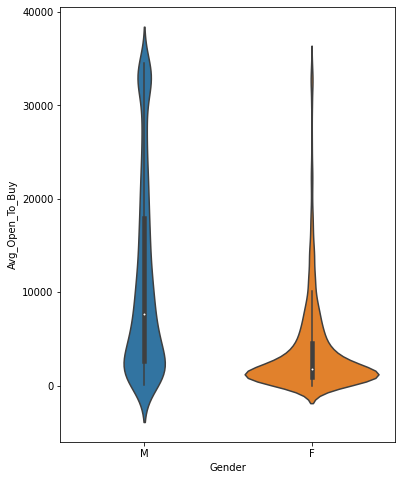

In [86]:
plt.figure(figsize=(6,8))
ax=sns.violinplot(x='Gender',y='Avg_Open_To_Buy', data=df)
plt.show() # Females were found more inclined towards open to buy.

In [87]:
# We can also find out by creating a pivot table to find out which gender was more open to buy :
df9=df.groupby(['Gender','Attrition_Flag'])['Avg_Open_To_Buy'].count()

In [88]:
df9.to_csv('Gender_Attrition_Flag.csv')
df9=pd.read_csv('Gender_Attrition_Flag.csv')
df9=pd.pivot_table(df9, values=None,index='Gender',columns='Attrition_Flag',fill_value=0,aggfunc=np.sum)
df9 # Females are more open to buy.

Avg_Open_To_Buy                  
Attrition_Flag Attrited Customer Existing Customer
Gender                                            
F                            930              4428
M                            697              4072

<AxesSubplot:xlabel='Gender'>

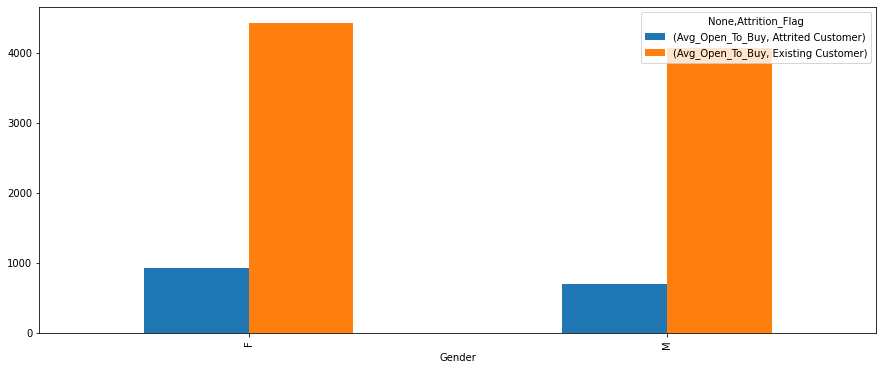

In [89]:
df9.plot(kind='bar', figsize=(15,6))

In [90]:
pip install openpyxl

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [91]:
df1=pd.read_excel("C:\\Users\\ASUS\\Documents\\Data Analysis\\BankChurners-1.xlsx", engine='openpyxl')

In [92]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [93]:
df1.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [94]:
df10=df1.drop(['CLIENTNUM','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Total_Trans_Amt'],axis=1)

In [95]:
df10.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [96]:
def Education_Level(x):
    if x =='High School':
        return 1
    if x =='Graduate':
        return 2
    if x =='Uneducated':
        return 3
    if x =='College':
        return 4
    if x =='Post-Graduate':
        return 5
    if x =='Doctorate':
        return 6
    if x =='Unknown':
        return 0
df10['Education_Level']=df10['Education_Level'].apply(Education_Level)
df10.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,1,Married,$60K - $80K,Blue,39,5,1,3,777,11914.0,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,2,Single,Less than $40K,Blue,44,6,1,2,864,7392.0,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,2,Married,$80K - $120K,Blue,36,4,1,0,0,3418.0,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,1,Unknown,Less than $40K,Blue,34,3,4,1,2517,796.0,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,3,Married,$60K - $80K,Blue,21,5,1,0,0,4716.0,0.000,0.000022,0.99998


In [97]:
df10.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [98]:
# Now we will start with our analysis with our predictive columns :
def Marital_Status(x):
    if x=='Married':
        return 1
    if x=='Single':
        return 2
    if x=='Divorced':
        return 3
    if x=='Unknown':
        return '0'
df10['Marital_Status']=df10['Marital_Status'].apply(Marital_Status)

In [99]:
df10=df10.replace('Less than $40K','20')
df10=df10.replace('$40K - $60K','50')
df10=df10.replace('$60K - $80K','70',)
df10=df10.replace('$80K - $120K','100')
df10=df10.replace('$120K +','150')
df10=df10.replace('Unknown','0')
df10['Income_Category']=df10['Income_Category'].astype(int)

In [100]:
df10.Income_Category.unique()

array([ 70,  20, 100,  50, 150,   0])

In [101]:
df10.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [102]:
def Card_Category(x):
    if x=='Blue':
        return 1
    if x=='Gold':
        return 2
    if x=='Silver':
        return 3
    if x=='Platinum':
        return 4
df10['Card_Category']=df10['Card_Category'].apply(Card_Category)
df10.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,1,1,70,1,39,5,1,3,777,11914.0,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,2,2,20,1,44,6,1,2,864,7392.0,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,2,1,100,1,36,4,1,0,0,3418.0,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,1,0,20,1,34,3,4,1,2517,796.0,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,3,1,70,1,21,5,1,0,0,4716.0,0.000,0.000022,0.99998


In [103]:
df10.Gender.unique()

array(['M', 'F'], dtype=object)

In [104]:
def Gender(x):
    if x =='M':
        return 1
    if x =='F':
        return 2
df10['Gender']=df10['Gender'].apply(Gender)
df10.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,1,3,1,1,70,1,39,5,1,3,777,11914.0,0.061,0.000093,0.99991
1,Existing Customer,49,2,5,2,2,20,1,44,6,1,2,864,7392.0,0.105,0.000057,0.99994
2,Existing Customer,51,1,3,2,1,100,1,36,4,1,0,0,3418.0,0.000,0.000021,0.99998
3,Existing Customer,40,2,4,1,0,20,1,34,3,4,1,2517,796.0,0.760,0.000134,0.99987
4,Existing Customer,40,1,3,3,1,70,1,21,5,1,0,0,4716.0,0.000,0.000022,0.99998


In [105]:
def Attrition_Flag(x):
    if x =='Existing Customer':
        return 1
    if x =='Attrited Customer':
        return 2
df10['Attrition_Flag']=df10['Attrition_Flag'].apply(Attrition_Flag)
df10.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,1,45,1,3,1,1,70,1,39,5,1,3,777,11914.0,0.061,0.000093,0.99991
1,1,49,2,5,2,2,20,1,44,6,1,2,864,7392.0,0.105,0.000057,0.99994
2,1,51,1,3,2,1,100,1,36,4,1,0,0,3418.0,0.000,0.000021,0.99998
3,1,40,2,4,1,0,20,1,34,3,4,1,2517,796.0,0.760,0.000134,0.99987
4,1,40,1,3,3,1,70,1,21,5,1,0,0,4716.0,0.000,0.000022,0.99998


In [107]:
# Income_Category is still an object which needs to be converted into a floating varaible :
df10['Marital_Status']=df10['Marital_Status'].astype(float)

In [109]:
# Now we can start with our analysis with the predictive columns, so first we need to import the naive bayes classifier function :
from sklearn.naive_bayes import GaussianNB

In [110]:
# Create a Gaussian Classifier
model = GaussianNB()

In [112]:
from sklearn.impute import SimpleImputer
impute_mean=SimpleImputer()

In [117]:
# We first need to segregate the data to fit the models seperating them by train and test dataset:
feature_columns=['Avg_Utilization_Ratio','Total_Revolving_Bal','Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Relationship_Count']
X=df10[feature_columns]
Y=df10.Attrition_Flag

In [119]:
X= imp_mean.fit_transform(X) # as we had to transform the dataframe into array to standardise the dataset we had to convert the values of all the feature columns to the same form so you can fit the model :

In [120]:
X

array([[6.100e-02, 7.770e+02, 3.000e+00, 1.000e+00, 5.000e+00],
       [1.050e-01, 8.640e+02, 2.000e+00, 1.000e+00, 6.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 5.000e+00],
       [0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 4.000e+00],
       [1.890e-01, 1.961e+03, 4.000e+00, 2.000e+00, 6.000e+00]])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
Scaler=StandardScaler()

In [125]:
Scaler.fit(X)

StandardScaler()

In [126]:
X2=Scaler.transform(X)

In [129]:
# Split thge data into training and testing parts :
X2_train,X2_test,Y_train,Y_test=train_test_split(X2,Y, test_size=0.2, random_state=13,stratify=Y)

In [130]:
# Now we will fit the model, Naive Bayes Classification :
from sklearn.naive_bayes import GaussianNB

In [131]:
nb = GaussianNB()

In [135]:
nb.fit(X2_train,Y_train)

GaussianNB()

In [136]:
nb.score(X2_test,Y_test)

0.8543928923988154

In [137]:
nb.score(X2_train,Y_train)

0.8577953339093939

In [146]:
Naive_Bayes = nb.predict(X2)

In [140]:
confusion_matrix(Y_test,nb.predict(X2_test))

In [139]:
roc_auc_score(Y_test,nb.predict(X2_test))

0.6357590557590558